In [156]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging 
logging.basicConfig(level = logging.INFO,
                    filename = 'model.log',
                    filemode = 'w',
                    format = '%(assctime)s - %(levelname)s -%(message)s',force = True)

In [157]:
df = pd.read_csv('./Dataset/Life Expectancy Data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [158]:
# Checking Dataset Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

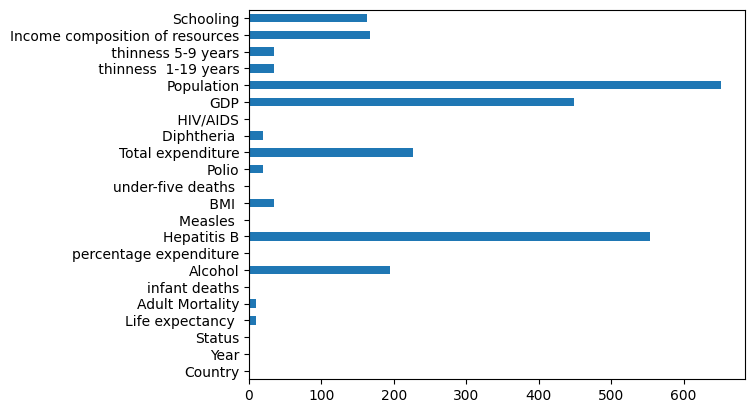

In [159]:
# Checking null values information stats
df.isnull().sum().plot(kind = 'barh')
plt.show()

In [160]:
# Checking Columns
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [161]:
# Segregate Categorical and Numerical Columns

numerical_col = df.select_dtypes(include = ['int64','float64'])
categorical_col = df.select_dtypes(include = 'object')

In [162]:
from sklearn.impute import SimpleImputer

for i in numerical_col.columns:
    sc = SimpleImputer(strategy='median')
    df[i] = sc.fit_transform(df[[i]])

In [163]:
from sklearn.impute import SimpleImputer

for i in categorical_col.columns:
    sc = SimpleImputer(strategy='most_frequent')
    df[i] = sc.fit_transform(df[[i]]).ravel()

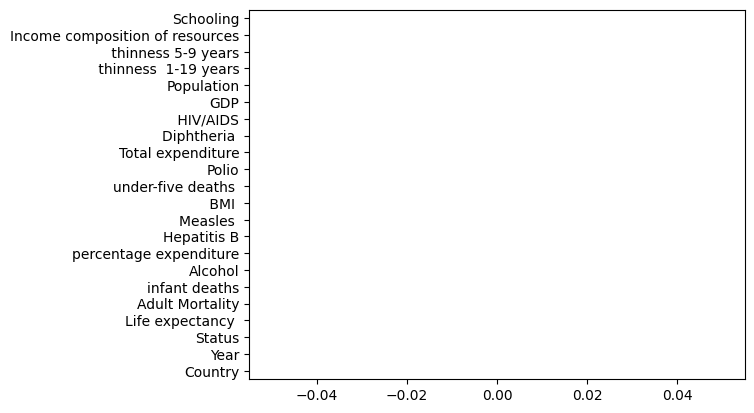

In [164]:
df.isnull().sum().plot(kind= 'barh')
plt.show()

In [165]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015.0,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014.0,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013.0,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012.0,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011.0,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [166]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [167]:
df = df[['Country', 'Year', 'Status', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling','Life expectancy ']]

<Axes: >

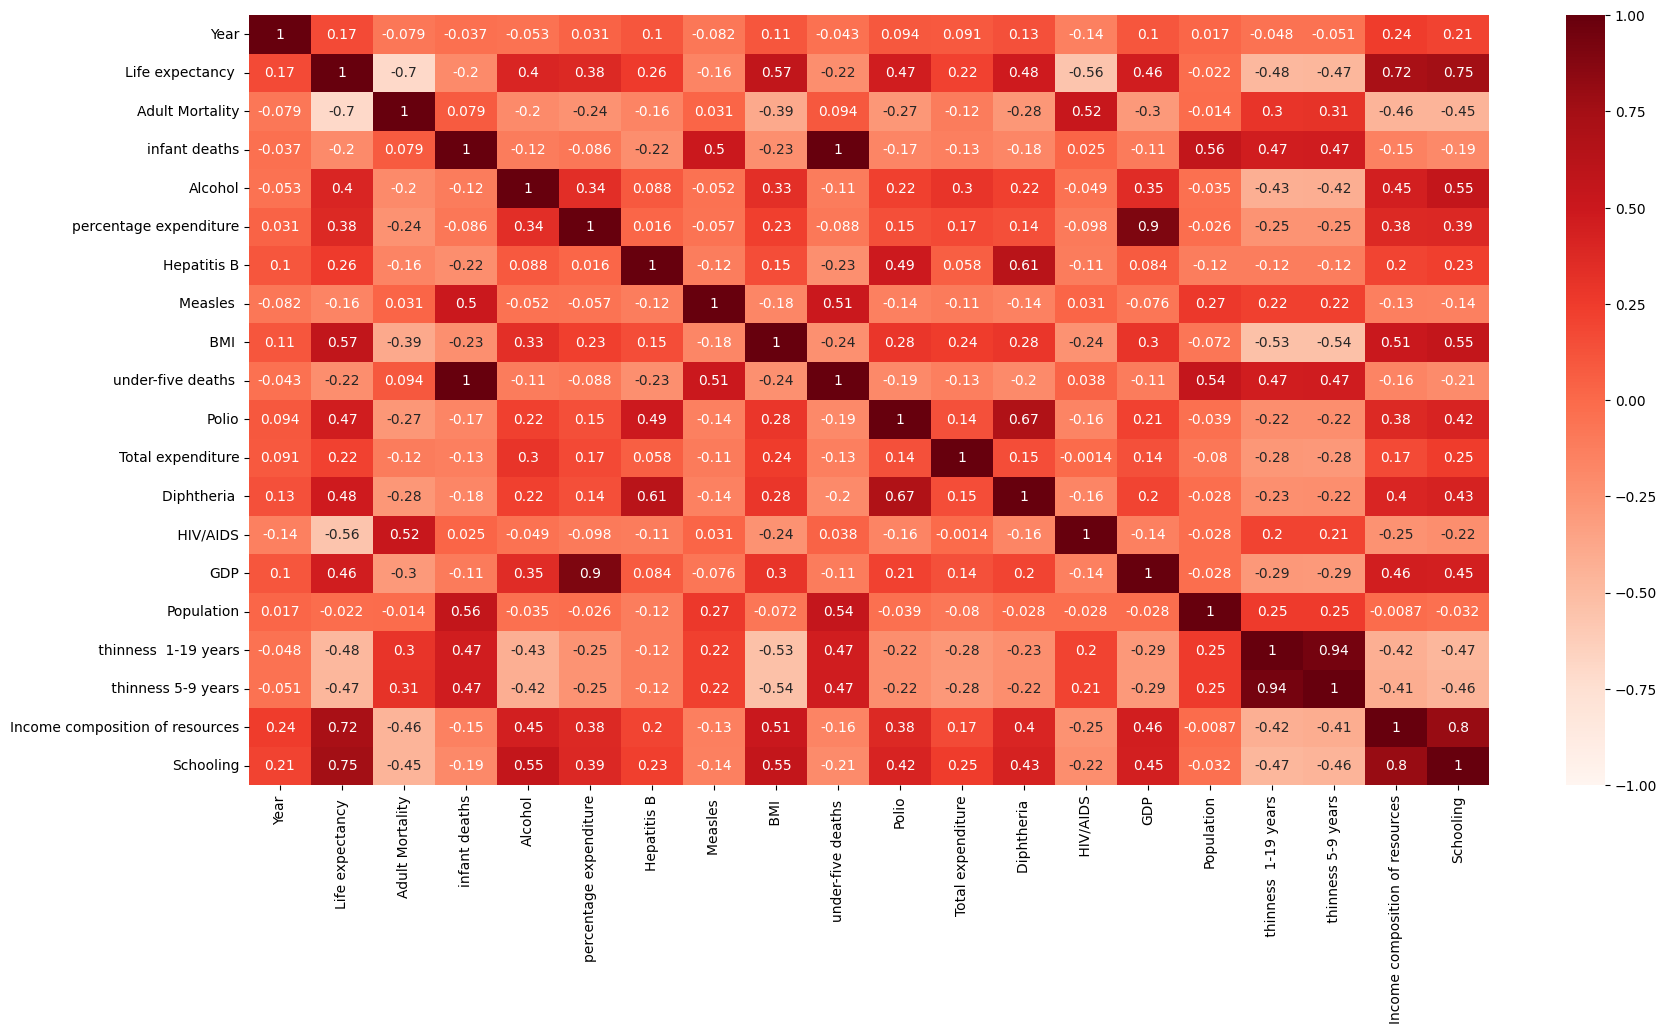

In [173]:
plt.figure(figsize=(20,10))
sns.heatmap(numerical_col.corr(), annot= True, vmax=1,vmin=-1,center=0,cmap='Reds')

In [ ]:
# Use Label Encoding
from sklearn.preprocessing import LabelEncoder
for i in categorical_col:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])

In [ ]:
df

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,0,2015.0,1,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,0,2014.0,1,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,0,2013.0,1,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,0,2012.0,1,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,0,2011.0,1,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004.0,1,723.0,27.0,4.36,0.000000,68.0,31.0,27.1,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,44.3
2934,192,2003.0,1,715.0,26.0,4.06,0.000000,7.0,998.0,26.7,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,44.5
2935,192,2002.0,1,73.0,25.0,4.43,0.000000,73.0,304.0,26.3,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,44.8
2936,192,2001.0,1,686.0,25.0,1.72,0.000000,76.0,529.0,25.9,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,45.3


In [ ]:
X = df.drop(columns = ['Country','Life expectancy ','Population'],axis = 1)
y = df['Life expectancy ']

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state= 42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

RF = RandomForestRegressor().fit(X_train,y_train)
y_pred_RF = RF.predict(X_test)

print('The Model Accuracy for the Random Forest Regressor: ',r2_score(y_test,y_pred_RF)*100)

The Model Accuracy for the Random Forest Regressor:  96.25445656943266


In [ ]:
import xgboost as xg

xgb = xg.XGBRegressor(random_state = 42).fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

print('Model Accuracy for XGBoost Regressor: ',r2_score(y_test,y_pred_xgb)*100)

Model Accuracy for XGBoost Regressor:  96.13593484873213


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor().fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

print('Model Accuracy for ADABoost Regressor:',r2_score(y_test,y_pred_ada)*100)

Model Accuracy for ADABoost Regressor: 90.52306682514909


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor().fit(X_train,y_train)
y_pred_gbr = gbr.predict(X_test)

print('Model Accuracy for Gradient Boosting Regressor:',r2_score(y_test,y_pred_gbr)*100)

Model Accuracy for Gradient Boosting Regressor: 94.87410130615719


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor(n_neighbors=3).fit(X_train,y_train)
y_pred_knn = KNN.predict(X_test)

print('Model Accuracy for KNN Neighbors Regressor:',r2_score(y_test,y_pred_knn)*100)

Model Accuracy for KNN Neighbors Regressor: 90.11421574871528


In [ ]:
from catboost import CatBoostRegressor

CBR = CatBoostRegressor().fit(X_train,y_train)
y_pred_cbr = CBR.predict(X_test)

print('Model Accuracy for Cat Neighbors Regressor:',r2_score(y_test,y_pred_cbr)*100)

Learning rate set to 0.045881
0:	learn: 9.0966697	total: 23ms	remaining: 23s
1:	learn: 8.7845045	total: 24.5ms	remaining: 12.2s
2:	learn: 8.4859304	total: 25.8ms	remaining: 8.59s
3:	learn: 8.1967839	total: 27.2ms	remaining: 6.76s
4:	learn: 7.9325992	total: 33.1ms	remaining: 6.59s
5:	learn: 7.6826531	total: 34.1ms	remaining: 5.64s
6:	learn: 7.4287513	total: 35ms	remaining: 4.97s
7:	learn: 7.1888248	total: 36ms	remaining: 4.46s
8:	learn: 6.9667155	total: 37.4ms	remaining: 4.12s
9:	learn: 6.7515607	total: 38.6ms	remaining: 3.82s
10:	learn: 6.5494584	total: 39.5ms	remaining: 3.55s
11:	learn: 6.3656098	total: 40.5ms	remaining: 3.33s
12:	learn: 6.1715206	total: 41.5ms	remaining: 3.15s
13:	learn: 5.9918498	total: 42.4ms	remaining: 2.98s
14:	learn: 5.8269043	total: 43.5ms	remaining: 2.85s
15:	learn: 5.6675348	total: 44.6ms	remaining: 2.74s
16:	learn: 5.5117017	total: 45.6ms	remaining: 2.63s
17:	learn: 5.3636642	total: 46.4ms	remaining: 2.53s
18:	learn: 5.2240001	total: 47.4ms	remaining: 2.45s


In [ ]:
# from sklearn.model_selection import RandomizedSearchCV

# RF = RandomForestRegressor(random_state=42)

# param_dist = {
#     'n_estimators': [100, 200, 400, 500],
#     'max_depth': [None, 10, 20, 40],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', None]  # Removed 'auto'
# }

# random_search = RandomizedSearchCV(
#     estimator=RF,
#     param_distributions=param_dist,
#     n_iter=50,
#     cv=5,
#     scoring='r2',
#     n_jobs=-1,
#     error_score='raise'  # Will raise exceptions immediately if any fit fails
# )

# #Fit to training data
# random_search.fit(X_train,y_train)

# #Best Model
# best_rf = random_search.best_estimator_
# print('Best Parameters:',random_search.best_params_)
# print('Best R2 Score on CV:',random_search.best_score_*100)

# Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
# Best R2 Score on CV: 95.15415193177577

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV

# XGB = xg.XGBRegressor(random_state=42)

# param_dist = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_depth': [3, 4, 5, 6, 7, 8, 10],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
#     'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
#     'gamma': [0, 0.1, 0.2, 0.3],
#     'min_child_weight': [1, 2, 3, 4],
#     'reg_alpha': [0, 0.01, 0.1, 1],
#     'reg_lambda': [0.1, 0.5, 1, 2]
# }

# random_search = RandomizedSearchCV(
#     estimator=XGB,
#     param_distributions=param_dist,
#     n_iter=50,              
#     scoring='r2',
#     cv=5,                   
#     random_state=42,
#     n_jobs=-1               
# )
# random_search.fit(X_train,y_train)

# best_rf = random_search.best_estimator_
# print('Best Parameters:',random_search.best_params_)
# print('Best R2 Score on CV:',random_search.best_score_*100)


# Best Parameters: {'subsample': 0.9, 'reg_lambda': 0.5, 'reg_alpha': 0.01, 'n_estimators': 400, 'min_child_weight': 4, 'max_depth': 8, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.6}
# Best R2 Score on CV: 95.96706015553995

In [ ]:
# Ridge, Lasso, Lasso(L2), Elastic Net(L1,L2), Huber Regressor, Ransac  ridge and lasso when model overfits use l1 and l2 models